# LAPD lab - Machine learning project - Result and comparison

This project aims to predict the GHI two hours in advance locally, from meteo data, date data and webcam images.

We are providing a machine learning model to achieve this task.

This notebook load the best result and compare them.

## Environnement and dataset definition

### Libraries

First, we import all important packages, data, and set the seed (for torch).


In [111]:
#importing packages
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

import os

from datetime import datetime

from google.colab import files ### file.download() to download a file from colab instead of right clicking

### Mounting the drive
You may need to adjust the path according to your needs.

In [4]:
#Mounting Drive
from google.colab import drive
# # # # This will prompt for authorization.
drive.mount("/content/drive")

## change path to where the folder of the images is
#path = 'drive/MyDrive/Colab Notebooks/CSS 433/data' #antonin
path = 'drive/MyDrive/master/CSS 433/data' #Jade
#path = 'drive/MyDrive/data' #Jade ordi 2
#path = 'drive/MyDrive/CSS 433/data' #Alison

for file in os.listdir(path):
  print(file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time.npy
new_irradiance.xlsx
persistent_level.npy
ground_truth.npy
labels.npy
meteo.xlsx
X.npy
median_Q1_Q3.xlsx
meteo_time_raw.xlsx
meteo_data_only.xlsx
iraddiance_raw.xlsx
meteo_summary.xlsx
labels_only_meteo.xlsx
model.pt
model_D.pt
__pycache__
helper_functions_py.py
model_C.pt
model_D.pkl
model2.pt
model_B.pt
model_B.pkl
model_Ab.pkl
model_A1.pkl
model_C.pkl


## Load and plot model results

In [16]:
location = [1270,4000,7900]
dist = 400
time_image = np.load(os.path.join(path, 'time.npy'),allow_pickle=True)
GHI = np.load(os.path.join(path, 'labels.npy'),allow_pickle=True)


10693


In [80]:
def reload(path_file):

  file_path = os.path.join(path, path_file)
  # Load the dictionary from the file
  with open(file_path, 'rb') as file:
    loaded_data = pickle.load(file)

  # Retrieve individual lists
  result1 = loaded_data['dataset1']
  result2 = loaded_data['dataset2']
  result3 = loaded_data['dataset3']

  return [result1,result2,result3]

def cut(path_file):

  R = reload(path_file)
  result = []

  for i in range(len(location)):
    time = time_image[location[i]:location[i]+dist]

    # Create a DataFrame
    df = pd.DataFrame(time, columns=['datetime'])

    # Sort the DataFrame based on the datetime feature
    df = df.sort_values('datetime')

    # Group by month
    df['month'] = df['datetime'].dt.month
    grouped = df.groupby('month')

    # Calculate the time difference between consecutive points for each month
    df['elapsed_time'] = grouped['datetime'].diff()

    # Convert the time difference to minutes
    df['elapsed_time_minutes'] = df['elapsed_time'].dt.total_seconds() / 60

    N = len(R[i])
    new_set = []
    j = -1

    for k in range(len(df['elapsed_time_minutes'])) :

      elapse = df['elapsed_time_minutes'][k]
      if math.isnan(elapse) or elapse == 10 :
        j += 1
      else :
        j += int(elapse//10)
      if j < len(R[i]) :
         new_set.append(R[i][j])

      print(k,len(R[i]),j)

    result.append(new_set)

  return result

In [82]:
model = ['model_A1.pkl','model_Ab.pkl','model_B.pkl','model_D.pkl']
name = ['Aa','Ab','B','D']

R1 = []
R2 = []
R3 = []

for M in model:
  R = reload(M)
  R1.append(R[0])
  R2.append(R[1])
  R3.append(R[2])

#RC = cut('model_C.pkl')

#C = reload('model_C.pkl')
#R1.append(RC[0])
#R2.append(RC[1])
#R3.append(RC[2])

#name.append('C')

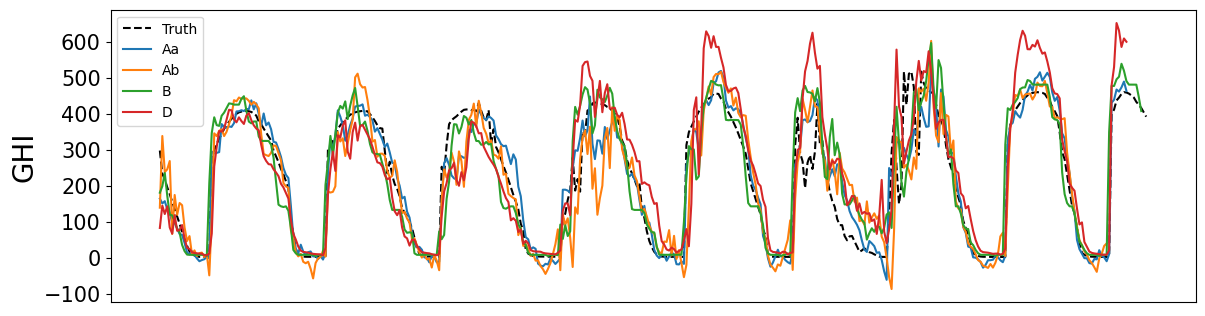

In [114]:
R = [R1,R2,R3]

loc = [location[-1]]
for i in range(len(loc)) :

#### a plot to visualize our predictions vs the true vlaues
  plt.figure(figsize=(14,3.8))

  #get current axes
  ax = plt.gca()
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  ax.set_ylabel("GHI", fontsize=20)
  ax.set_xlabel("time", fontsize=20)
  plt.plot(GHI[location[i]:location[i]+dist], '--k',label = 'Truth')
  #plt.ylim(-50,1000)

  for j in range(len(R[i])) :
    plt.plot(R[i][j], label = name[j])
  if i == 0:
    plt.legend(loc = 'best')
  if i != 2:
    ax.get_xaxis().set_visible(False)
  plt.show()
